In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data//weather.csv')

<AxesSubplot:xlabel='Date.Full', ylabel='Data.Precipitation'>

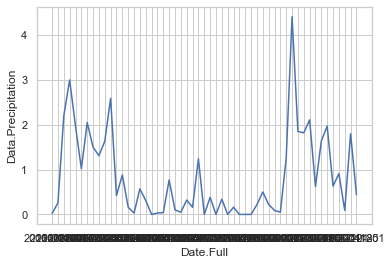

In [ ]:
# Graph of Data.Precipitation for Station.City == 'Seattle' based on the date
sns.lineplot(x='Date.Full', y='Data.Precipitation', data=df[df['Station.City'] == 'Seattle'])


In [19]:
# Interactive graph of Data.Precipitation for Station.City == 'Seattle' based on the date using Plotly
import plotly.express as px
fig = px.line(df[df['Station.City'] == 'Seattle'], x='Date.Full', y='Data.Precipitation')
fig.update_layout(title='Data.Precipitation for Station.City == Seattle based on the date')
# legend 
fig.update_layout(showlegend=True)
fig.show()

In [18]:
df

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16


In [3]:
df = pd.read_csv('data//weather.csv')

In [5]:
# Determine the size of each chunk (ensure the DataFrame can be evenly split)
num_chunks = 5
chunk_size = len(df) // num_chunks

# Split the DataFrame into 5 equal parts
dfs = [df[i*chunk_size:(i+1)*chunk_size] for i in range(num_chunks)]

# Save each part with different file extensions
dfs[0].to_csv('data//part1.csv', index=False)        # Save as .csv
dfs[1].to_excel('data//part2.xlsx', index=False)      # Save as .xlsx
dfs[2].to_json('data//part3.json', orient='records')  # Save as .json
dfs[3].to_parquet('data//part4.parquet', index=False) # Save as .parquet
dfs[4].to_html('data//part5.html', index=False) 

<ipython-input-5-4a202fe26040>:10: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  dfs[1].to_excel('data//part2.xlsx', index=False)      # Save as .xlsx


In [8]:
# Read each file back into a DataFrame
df1 = pd.read_csv('data//part1.csv')
df2 = pd.read_excel('data//part2.xlsx')
df3 = pd.read_json('data//part3.json')
df4 = pd.read_parquet('data//part4.parquet')
df5 = pd.read_html('data//part5.html')[0]  # `read_html` returns a list of tables, so select the first one

# Concatenate all parts into a single DataFrame
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Save the combined DataFrame as a single CSV file
combined_df.to_csv('data//weather.csv', index=False)